<a href="https://colab.research.google.com/github/JuanRosales707/md-lab01-RC/blob/main/LAB06_MD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install ucimlrepo

In [9]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

## **a. Lea la base de datos, realice imputaciones, tratamiento de outliers y transformaciones de datos  en caso sea necesario. Además, separe la variable de clasificación del resto de variables para  luego obtener los datos de entrenamiento y prueba, tomando de este último el 25% de datos.**

In [10]:
import pandas as pd
import numpy as np

# Revisar valores faltantes
print(X.isnull().sum())


Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
dtype: int64


In [11]:
# Convertimos a numérico forzando errores a NaN
X["Bare_nuclei"] = pd.to_numeric(X["Bare_nuclei"], errors='coerce')

# Imputamos usando la media
X["Bare_nuclei"].fillna(X["Bare_nuclei"].mean(), inplace=True)


<ipython-input-11-790a1582b0a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Bare_nuclei"] = pd.to_numeric(X["Bare_nuclei"], errors='coerce')
<ipython-input-11-790a1582b0a3>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["Bare_nuclei"].fillna(X["Bare_nuclei"].mean(), inplace=T

In [12]:
# Detectamos y tratamos outliers por IQR
for col in X.columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    X[col] = np.where(X[col] < lower, lower, X[col])
    X[col] = np.where(X[col] > upper, upper, X[col])


<ipython-input-12-a3ccee7c252f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = np.where(X[col] < lower, lower, X[col])
<ipython-input-12-a3ccee7c252f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = np.where(X[col] > upper, upper, X[col])
<ipython-input-12-a3ccee7c252f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split

# y ya está definido en tu código original
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y.values.ravel(), test_size=0.25, random_state=42)


## **b. Genere el modelo k-NN y determine la cantidad de vecinos más adecuada con el método gráfico visto en clase. Además, calcule las métricas de clasificación que se implementaron en la parte práctica e interprete sus resultados más importantes.**

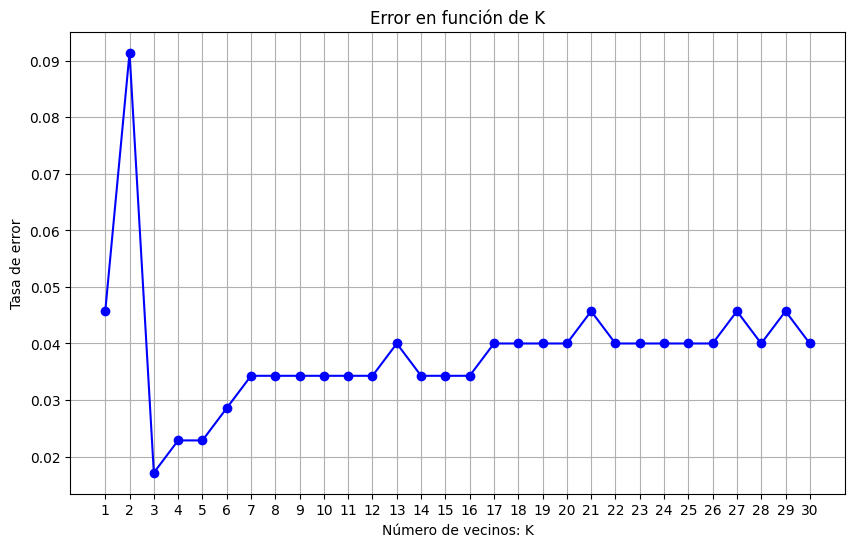

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Probamos k de 1 a 30
error_rates = []
k_range = range(1, 31)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, pred_k)
    error_rates.append(error)

# Graficamos
plt.figure(figsize=(10, 6))
plt.plot(k_range, error_rates, marker='o', linestyle='-', color='blue')
plt.title('Error en función de K')
plt.xlabel('Número de vecinos: K')
plt.ylabel('Tasa de error')
plt.xticks(range(1, 31))
plt.grid(True)
plt.show()

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

# Métricas de desempeño
report = classification_report(y_test, y_pred, target_names=["Benigno (2)", "Maligno (4)"])
print("\nReporte de Clasificación:")
print(report)

Matriz de confusión:
[[116   2]
 [  2  55]]

Reporte de Clasificación:
              precision    recall  f1-score   support

 Benigno (2)       0.98      0.98      0.98       118
 Maligno (4)       0.96      0.96      0.96        57

    accuracy                           0.98       175
   macro avg       0.97      0.97      0.97       175
weighted avg       0.98      0.98      0.98       175



## **c. Realice un balanceo de clases mediante la técnica SMOTE, vuelva a generar el modelo de  clasificación, calcule sus métricas y compárelas con las del modelo sin balancear para ver si  hubo o no mejoras**

In [21]:
!pip install imbalanced-learn

In [25]:
from imblearn.over_sampling import SMOTE

# Aplicamos SMOTE solo en los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


print("Distribución original:", pd.Series(y_train).value_counts())
print("Distribución SMOTE:", pd.Series(y_train_smote).value_counts())


Distribución original: 2    340
4    184
Name: count, dtype: int64
Distribución SMOTE: 2    340
4    340
Name: count, dtype: int64


In [26]:
knn_smote = KNeighborsClassifier(n_neighbors=5)
knn_smote.fit(X_train_smote, y_train_smote)

# Predecimos en el conjunto de prueba (sin SMOTE)
y_pred_smote = knn_smote.predict(X_test)


In [27]:
from sklearn.metrics import classification_report, confusion_matrix

# Métricas del modelo con SMOTE
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
report_smote = classification_report(y_test, y_pred_smote, target_names=["Benigno (2)", "Maligno (4)"])

print("Matriz de Confusión (SMOTE):")
print(conf_matrix_smote)
print("\nReporte de Clasificación (SMOTE):")
print(report_smote)

Matriz de Confusión (SMOTE):
[[116   2]
 [  0  57]]

Reporte de Clasificación (SMOTE):
              precision    recall  f1-score   support

 Benigno (2)       1.00      0.98      0.99       118
 Maligno (4)       0.97      1.00      0.98        57

    accuracy                           0.99       175
   macro avg       0.98      0.99      0.99       175
weighted avg       0.99      0.99      0.99       175

